In [1]:
%pip install seaborn

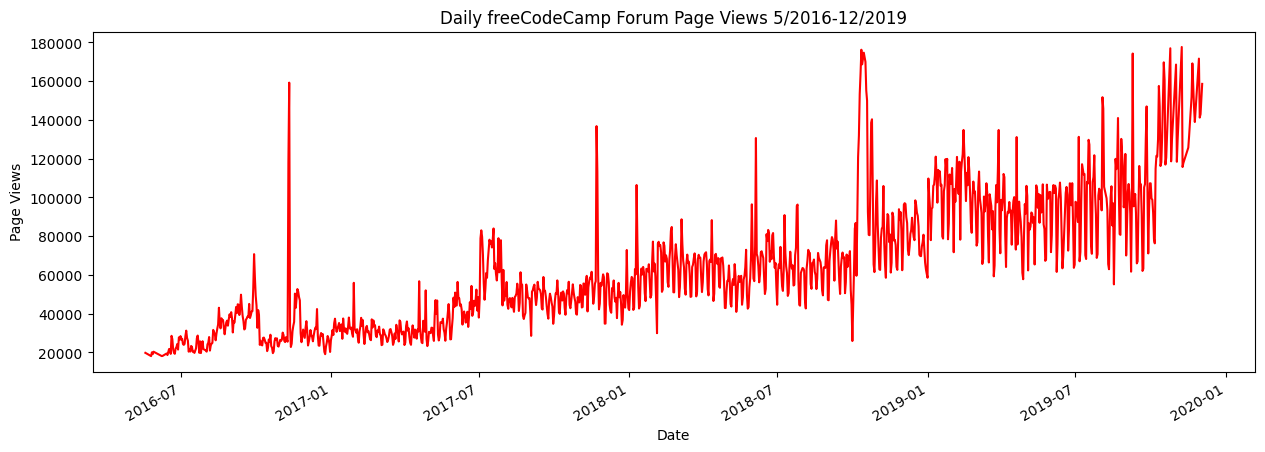

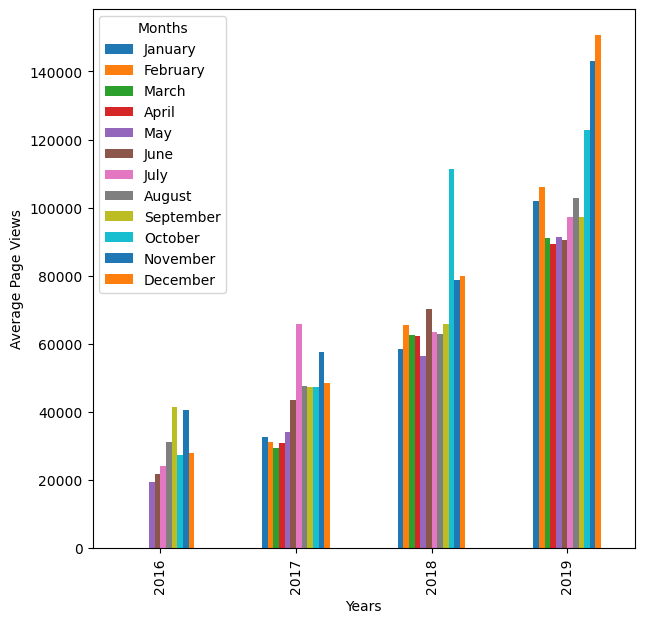

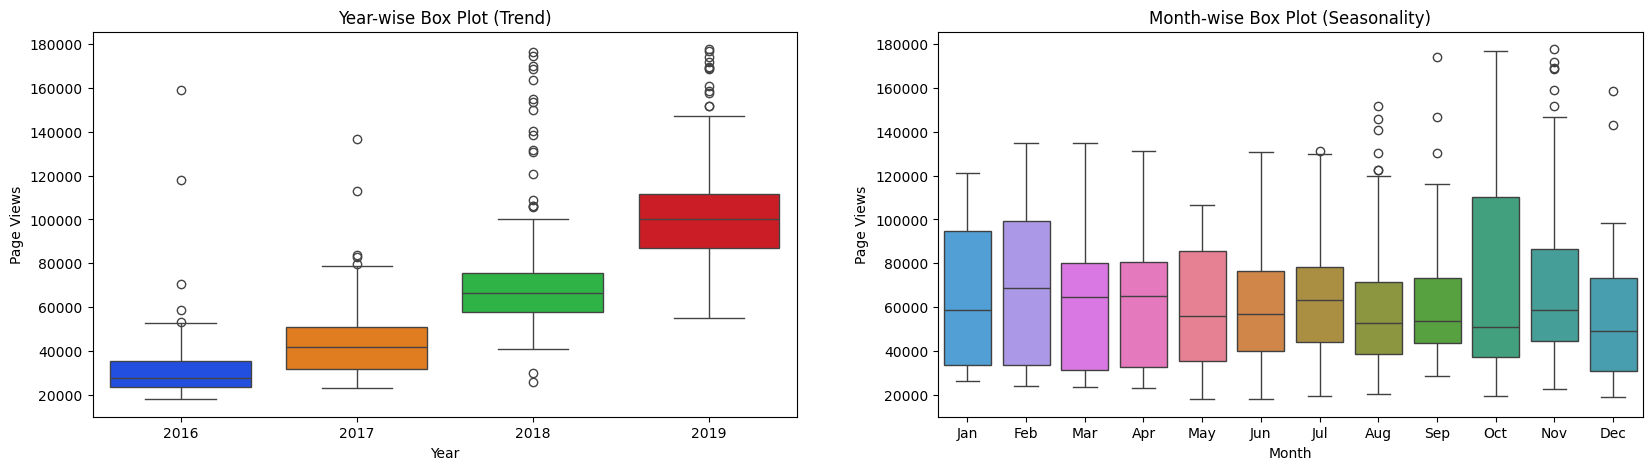

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'])
df=df.set_index('date')

# Clean data
df = df[((df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975)))]


draw_line_plot()

draw_bar_plot()

draw_box_plot()



def draw_line_plot():

    # Draw line plot
    df_line=df.copy()
    fig=df_line.plot.line(figsize=(15,5),color='red', legend=False).figure;
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    
    # Save image and return fig (don't change this part)
    
    fig.savefig('line_plot2.png')
    return fig

def draw_bar_plot():

    # Copy and modify data for monthly bar plot
    
    df_bar=df.copy()
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.month_name()
    df_bar_group=df_bar.groupby(['year','month'])['value'].mean()
    df_bar_group=df_bar_group.unstack(level='month')
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']]
   

    # Draw bar plot
    
    fig2 = df_bar_group.plot.bar(figsize=(7,7)).figure
    plt.xlabel("Years");
    plt.ylabel("Average Page Views");
    plt.legend(title="Months");
    
    # Save image and return fig (don't change this part)
    
    fig2.savefig('bar_plot.png')
    return fig2


def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Draw box plots (using Seaborn)
    fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1=sns.boxplot(data=df_box,x='year',y='value',ax=ax1,hue="year",legend=False,palette="bright");
    ax2=sns.boxplot(data=df_box,x='month',y='value',ax=ax2,order=mon_order,hue="month");
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig3.savefig('box_plot.png')
    return fig3

